# Lecture 26 Part 2 - Deep Learning & Convolutional Neural Networks (CNNs)

# Deep Learning

Until the late 2000s, the broader class of systems that fell under the label **machine learning** heavily relied on **feature engineering**. Features are transformations on input data that result in numerical features that facilitate a downstream algorithm, like a classifier, to produce correct outcomes on new data. Feature engineering is aimed at taking the original data and coming up with representations of the same data that can then be fed to an algorithm to solve a problem.

**Deep learning**, on the other hand, deals with finding such representations automatically, from raw data, in order to successfully perform a task. This is not to say that **feature engineering** has no place with deep learning; we often need to inject some form of prior knowledge in a learning system. However, the ability of a neural network to ingest data and extract useful representations on the basis of examples is what makes deep learning so powerful. The focus of deep learning practitioners is not so much on hand-crafting those representations, but on operating on a mathematical entity so that it discovers representations from the training data autonomously. Often, these automatically-created features are better than those that are hand-crafted! As with many disruptive technologies, this fact has led to a change in perspective.

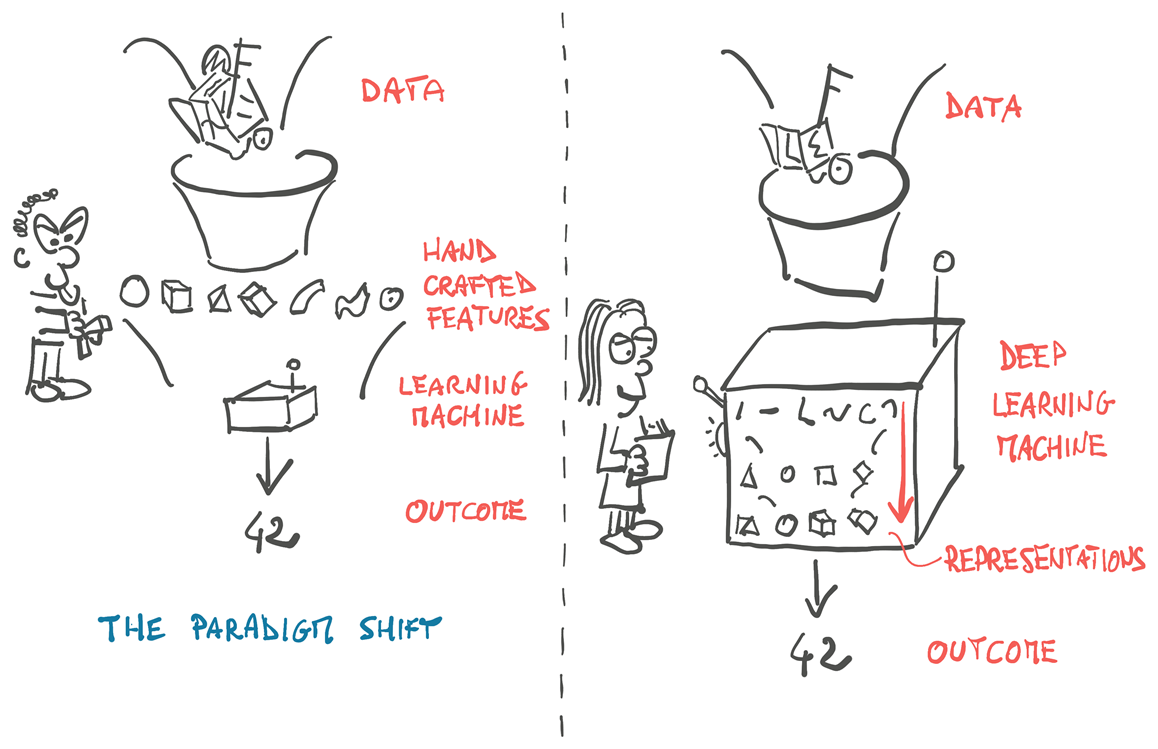

In [1]:
from IPython.display import Image
Image('figures/deeplearning.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

At the core of **deep learning** are **neural networks** with *many* layers (hence the *deep* architecture), mathematical entities capable of representing complicated functions through a composition of simpler functions.

# Brief History of Convolutional Neural Networks (CNNs or ConvNets)

### 1950-1962 Hubel & Wiesel - Neural Basics of Visual Perception

* Introduced the Neural Basics of Visual Perception, https://www.youtube.com/watch?v=IOHayh06LJ4&t=3s

* https://www.youtube.com/watch?v=8VdFf3egwfg

* Won the 1981 Nobel Prize for Physiology or Medicine

* Hubel, D. H., & Wiesel, T. N.: Receptive fields of single neurones in the cat's striate cortex. The Journal of physiology, 148(3), 574-591 (1959).

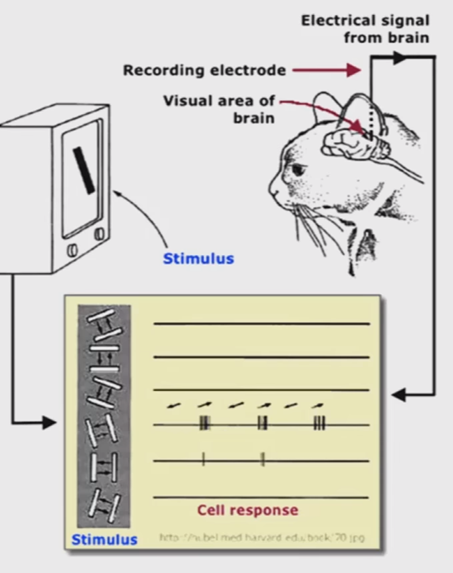

In [2]:
Image('figures/Hubel_and_Wiesel.png', width=400)

### 1980 Fukushima - Neocognitron

* Kunihiko Fukushima introduces **Neocognitron**, inspired by the work of Hubel & Wiesel. 
* Neocognitron introduced the basic layers of convolutional networks: convolutional layers and downsampling layers.

* Fukushima, K. Neocognitron: A self-organizing neural network model for a mechanism of pattern recognition unaffected by shift in position. Biol. Cybernetics 36, 193–202 (1980).

<!-- ![Fukushima1980](https://www.researchgate.net/profile/Kunihiko-Fukushima-2/publication/336163445/figure/fig1/AS:809198191398912@1569939291177/The-architecture-of-the-neocognitron.png) -->

### 1987 Waibel - Time Delay Neural Network (TDNN)

* First convolutional network was the **Time Delay Neural Network (TDNN)** introduced by Alex Waibel, it achieved shift invariance and it was trained with Backpropagation, using the same hierarchical structure of the Neocognitron. 

* TDNNs are convolutional networks that share weights along the temporal dimension.

* Waibel, Alex: Phoneme Recognition Using Time-Delay Neural Networks. Meeting of the Institute of Electrical, Information and Communication Engineers (IEICE). Tokyo, Japan (1987).

<!-- ![TDNN](https://upload.wikimedia.org/wikipedia/commons/3/3b/TDNN_Diagram.png) -->

### 1989 Hampshire & Waibel - Variant of TDNN with two-dimensional convolution

* As TDNNs operated on spectrograms, this two-dimensional convolution variant allows for the phoneme recognition system to both shift in time and in frequency. 

* This inspired translation invariance in image processing with convolutional networks.

* Hampshire, J.B and Waibel, A.: Connectionist Architectures for Multi-Speaker Phoneme Recognition. Advances in Neural Information Processing Systems, Morgan Kaufmann (1990).

### 1990 Yamaguchi - Max-Pooling

* Fixed filtering operation that calculates and propagates the maximum value of a given region.

* Yamaguchi, K.; Sakamoto, K.; Akabane, T.; Fujimoto, Y.: A Neural Network for Speaker-Independent Isolated Word Recognition. First International Conference on Spoken Language Processing, 1077-1980 (1990).

### 1989 LeCun - Convolution Neural Networks (CNNs)

* Introduced a CNN-based system to recognize hand-written ZIP Code numbers.

* The first system involved convolutions in which the kernel coefficients had been laboriously hand designed.

* Later, LeCun designed a system that used backpropagation to learn the convolution kernel coefficients directly from images, completely automatic.

* Y. LeCun, B. Boser, J. S. Denker, D. Henderson, R. E. Howard, W. Hubbard, L. D. Jackel: Backpropagation Applied to Handwritten Zip Code Recognition, AT&T Bell Laboratories (1989).

### 2004 GPU Breakthrough

* In 2004, it was shown by K. S. Oh and K. Jung that standard neural networks can be greatly accelerated on GPUs. Their implementation was 20 times faster than an equivalent implementation on CPU.

* Many other successes...

$\vdots$

### 2012 Krizhevsky - ImageNet Competition

* A GPU-based CNN won the "ImageNet Large Scale Visual Recognition Challenge 2012".

* A very deep CNN with over 100 layers by Microsoft won the ImageNet 2015 contest.

* Krizhevsky, Alex; Sutskever, Ilya; Hinton, Geoffrey E.: ImageNet classification with deep convolutional neural networks. Communications of the ACM. 60 (6): 84–90 (2017).

$\vdots$

---

# Convolutional Neural Networks (CNNs or ConvNets)

In the last few years, **Convolutional Neural Networks (CNNs)** have become popular in the areas of image recognition, object detection, segmentation, and many other tasks in the field of computer vision. They are also becoming popular in the field of **natural language processing (NLP)**.

The fundamental difference between fully connected layers and convolution layers is the way the weights are connected to each other in the intermediate layers.

One of the biggest challenges of using a linear layer or fully connected layers for computer vision is that they lose all spatial information, and the complexity in terms of the number of weights used by fully connected layers is too big. For example, when we represent a $224\times 224$ color image as a flat array, we would end up with $150 528$-dimensional feature vector ($224 \times 224 \times 3$). When the image is flattened, we lose all the spatial information.

There is a better way! It consists in replacing the dense, fully-connected affine transformation in our neural network unit with a different linear operation: **convolution**.

## Why convolution?

Convolutions are very common operations. Here are some image processing examples:

* **Edge Detection:** can detect edges by convolving with edge masks (e.g., the Sobel edge detectors)

$$S_v = \left[\begin{array}{ccc}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right]$$

$$S_h = \left[\begin{array}{ccc}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right]$$

The vertical and horizontal Sobel edge masks.

* **Image Smoothing:** can smooth/blur images using a mean filter.

* **Unsharp Masking:** can sharpen imagery by subtracting a mean filtered image from the original.

* and many more...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

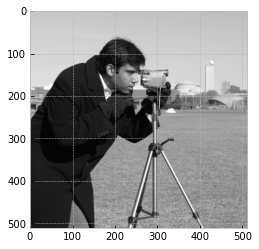

In [4]:
from skimage import data

# image = data.checkerboard()
image = data.camera()
# image = data.clock()
# image = data.coins()
# image = data.moon()
# image = data.text()
plt.imshow(image, cmap='gray');

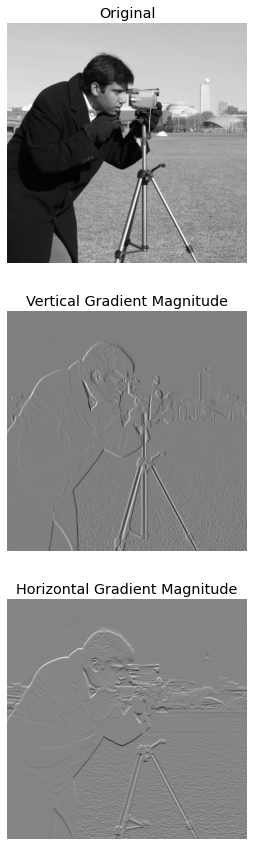

In [5]:
import scipy.signal as signal

vMask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
hMask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

gradV = signal.convolve2d(image, vMask, boundary='symm', mode='same')
gradH = signal.convolve2d(image, hMask, boundary='symm', mode='same')

fig, (ax_orig, ax_mag, ax_mag2) = plt.subplots(3,1,figsize=(6,15))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title("Original")
ax_orig.set_axis_off()
ax_mag.imshow(gradV, cmap='gray')
ax_mag.set_title("Vertical Gradient Magnitude")
ax_mag.set_axis_off()
ax_mag2.imshow(gradH, cmap='gray')
ax_mag2.set_title("Horizontal Gradient Magnitude")
ax_mag2.set_axis_off()

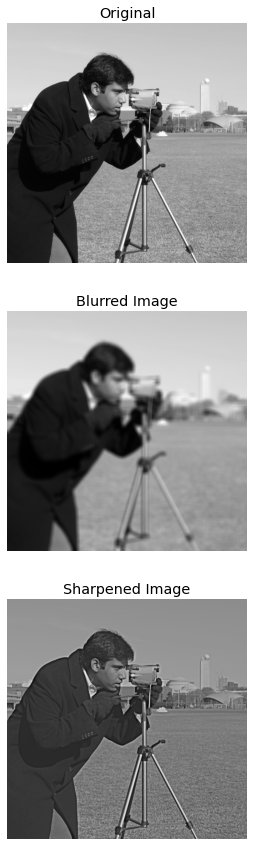

In [6]:
# Mean Filter Mask
mMask = (1/100)*np.ones((10,10))

# Blurring
blurI = signal.convolve2d(image, mMask, boundary='symm', mode='same')

# Unsharp Masking
sharpI = image + (image - blurI)

fig, (ax_orig, ax_mag, ax_mag2) = plt.subplots(3,1,figsize=(6,15))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title("Original")
ax_orig.set_axis_off()
ax_mag.imshow(blurI, cmap='gray')
ax_mag.set_title("Blurred Image")
ax_mag.set_axis_off()
ax_mag2.imshow(sharpI, cmap='gray')
ax_mag2.set_title("Sharpened Image")
ax_mag2.set_axis_off()

* So, various convolutions have the ability to enhance and extract features of interest.

* The idea behind a convolutional neural network is to learn the features needed to perform classification (or regression) during the learning process for the neural network. This is in contrast with approaches in which you first identify features of importance, extract them in advance, and then train a classifier (e.g., a neural network) on the extracted features.

**Example:** if we ought to recognize patterns corresponding to objects, like an airplane in the sky, we will likely need to look at how nearby pixels are arranged, and we would be less interested at how pixels that are far from each other appear in combination. Essentially, it doesn't matter if our image of a Spitfire has a tree or cloud or kite in the corner or not.

In order to translate this intuition in mathematical form, we could compute the weighted sum of a pixel with its immediate neighbors, rather than with all other pixels in the image. This would be equivalent to building weight matrices, one per output feature and output pixel location, in which all weights beyond a certain distance from a center pixel are zero. This will still be a weighted sum, i.e. a linear operation.

We would like these localized patterns to have an effect on the output no matter their location in the image, i.e. to be **translation-invariant**. 

To do that, we would need to force the weights in each per-output-pixel family of patterns to have same values, regardless of pixel location. To achieve this goal, we would need to initialize all weight matrices in a family with the same values, and, during back-propagation, average the gradients for all pixel locations and apply that average as the update to all weights in the family.

For this reason, CNNs are often called **shared weight neural networks**. This is because several connections in the network are tied together to have the same value.

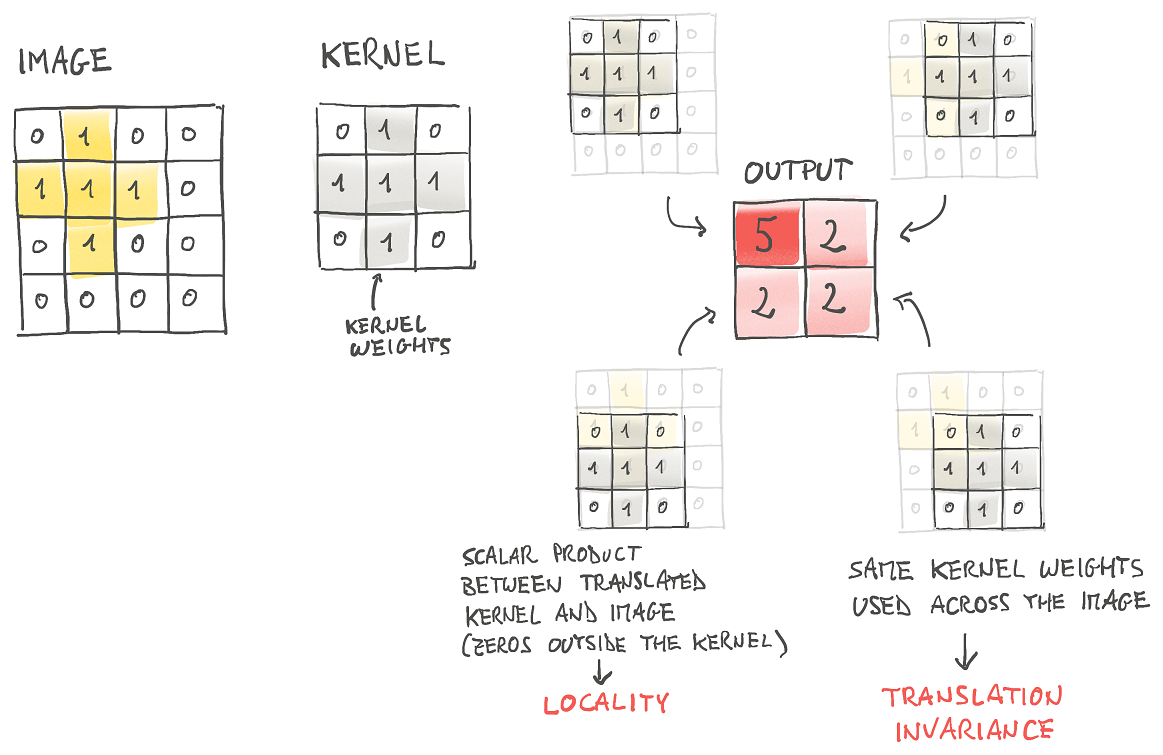

In [7]:
Image('figures/convolution.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

When we switch standard fully connected networks (MLPs) with CNNs, we get:

* local operations on neighborhoods
* translation-invariance
* models with a lot fewer parameters

## 1.2. Shared-weight Neural Networks

Consider a 2-D convolution (used, for example, in image processing):

$$g(x,y) \ast f(x,y) = \sum_{s=-a}^a \sum_{t=-b}^b g(s,t) f(x-s, y-t)$$

where $g$ is the filter and $f$ is the image to be convolved. Essentially, we flip both horizontally and vertically and, then, slide $g$ accross $f$ where at each location we perform a pointwise multiplication and then a sum.

To understand better how are we exactly creating a neural network that extracts features using convolution operations, we need to first consider that a convolutional can be written as a *linear operation* with a **doubly block circulant matrix**.

$$H(x,y) = F(x,y) \ast g(x,y)$$

is the same as

$$h = Gf$$

where $f$ and $h$ are the vectorized forms of $F$ and $G$ is a doubly block circulant matrix.

Consider the following small image:

$$Im = \left[\begin{array}{cccc}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & 11 & 12\\
13 & 14 & 15 & 16
\end{array}\right]$$

We can vectorize it and obtain:

$$I^T = [1,2,3,\dots, 14,15,16]$$

Let's consider the following kernel:

$$k = \left[\begin{array}{ccc}
-1 & -2 & -3\\
-4 & -5 & -6\\
-7 & -8 & -9
\end{array}\right]$$

Let $G$ be:

$$G = \left[\begin{array}{cccccccccccccccc}
-1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9\\
\end{array}\right]$$

So, we can write the convolution as the matrix multiplication:

$$GI$$

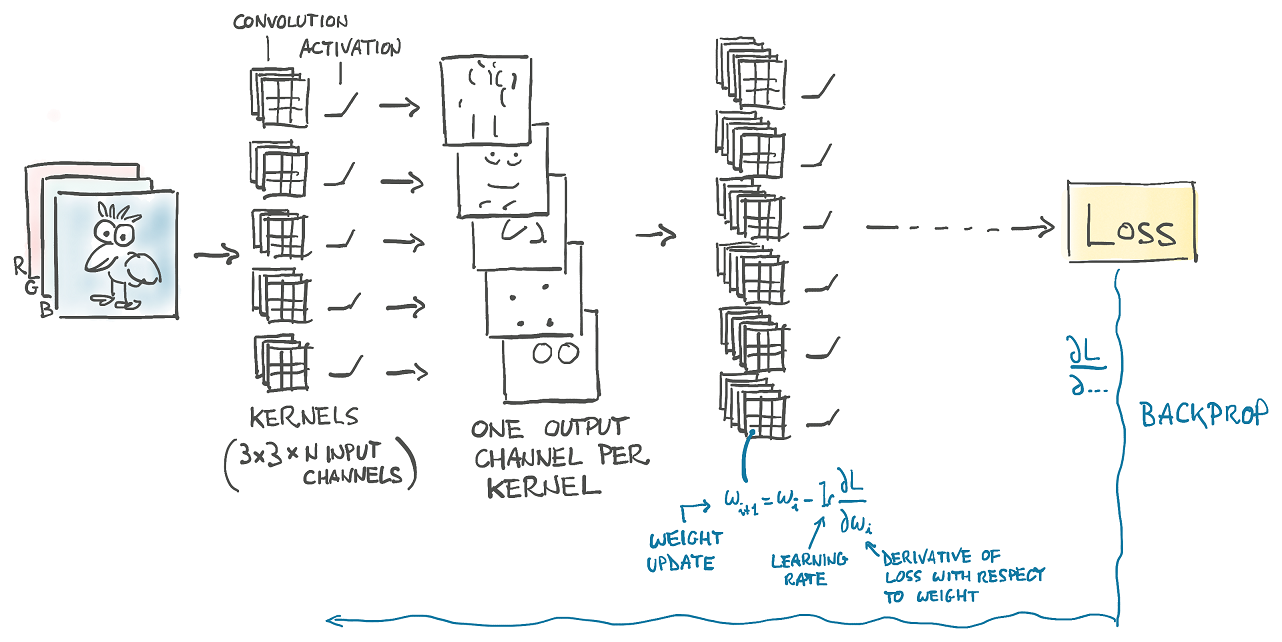

In [8]:
Image('figures/filters.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

## 1.3. Kernel/Filter Sizes

Small kernels, like $3 \times 3$ or $5 \times 5$ provide very local information. The problem is how do we know that big picture all structures in our images are 3 pixels or 5 pixels wide?

In order to identify larger objects in an image we will need large convolution kernels. Well, sure, at the limit we could get a
$32 \times 32$ kernel for a $32 \times 32$ image, but we would converge to the old fully connected, affine transformation and lose all the nice properties of convolution. 

Another option, which is what is used in convolutional neural networks, is stacking one convolution after the other, and at the same time downsampling the image in-between successive convolutions.

![CNNs](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/593px-Typical_cnn.png)

So, on one hand, the first set of kernels operates on small neighborhoods on first-order, low-level features, while the second set of kernels effectively operates on wider neighborhoods, producing features that are compositions of the previous features. This is a very powerful mechanism that provides convolutional neural networks with the ability to see into very complex scenes

## 1.4. Pooling Layers and Strides

Downsampling could in principle occur in different ways. Scaling an image by a half is the equivalent of taking 4 neighboring pixels in input and producing one pixel in output. How we compute the value of the output based on the values of the input is up to us. We could:

* **Average-pooling**: average the four pixels. This was a common approach early on, but has since fallen out of favor somewhat.
* **Max-pooling**: take the maximum of the four pixels. This is currently the most commonly used approach, but has a downside of discarding the other 3/4ths of the data.
* **Stride**: perform a strided convolution, where only every Nth pixel is calculated. A 3x4 convolution with stride 2 still incorporates input from all pixels from the previous layer. Current literature shows promise for this approach, but it has not yet supplanted maxpool.

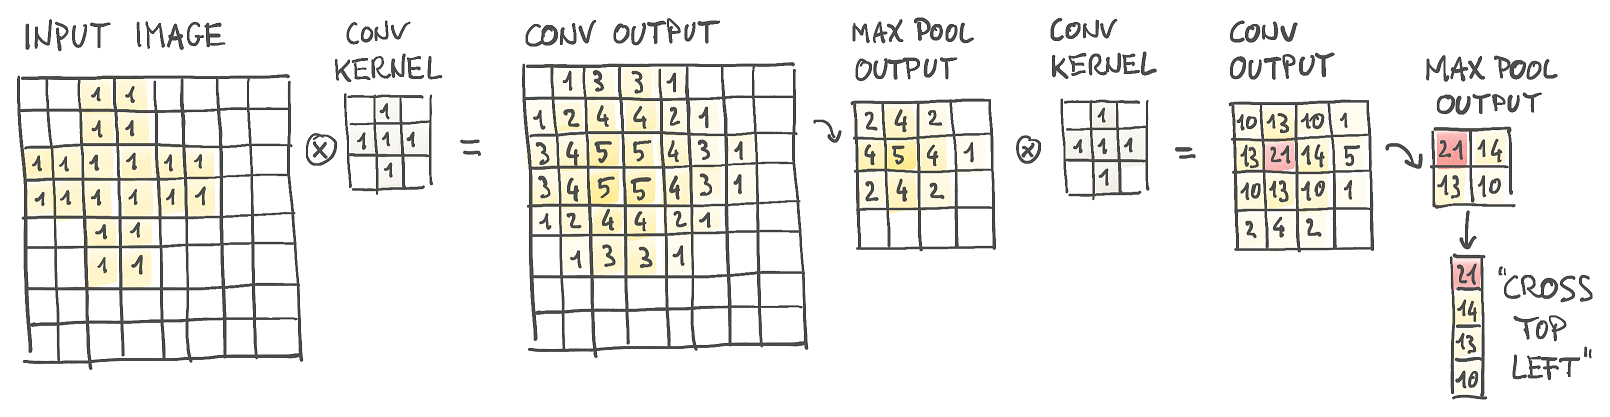

In [9]:
Image('figures/maxpooling.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

Intuitively, the output images from a convolution layer, especially since they are followed by an activation just like any other linear layer, will tend to have a high magnitude where certain features corresponding to the estimated kernel are detected (e.g. vertical lines). By keeping the highest value in the 2x2 neighborhood as the downsampled output, we ensure that the features that have been found survive the downsampling, at the expense of the weaker responses.

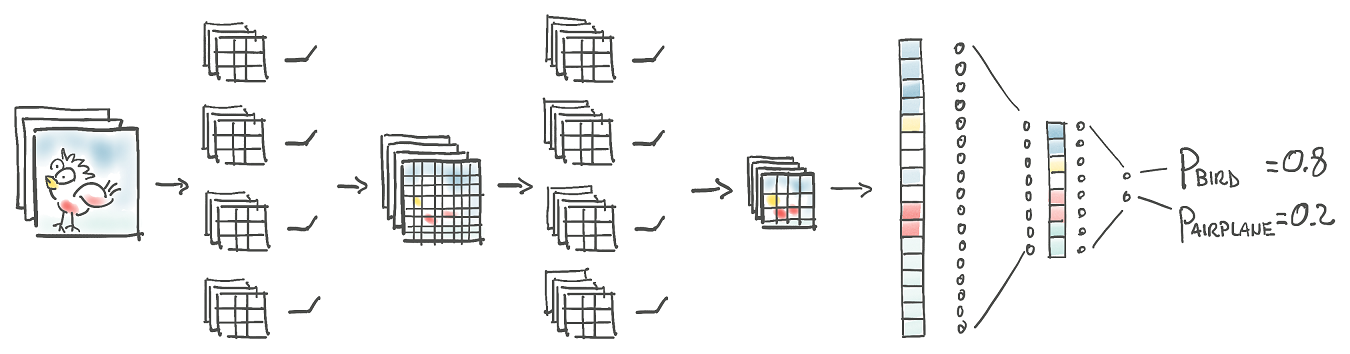

In [10]:
Image('figures/CNN.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

In deep learning, we let kernels get estimated from data, in a way that the discrimination is most effective. For instance, in terms of non-negative log likelihood of the output compared to ground truth. From this angle, the job of a convolutional neural network is to estimate the kernel of a set of filter banks in successive layers, that will transform a multi-channel image into another multi-channel image, where different channels will correspond to different features (e.g. one channel for the average, another channel for vertical edges, etc).

---

# TensorFlow Implementation

In [11]:
import tensorflow as tf
from tensorflow import keras

A 2D convolutional layer with ```tf.keras``` looks like:

In [12]:
conv = keras.layers.Conv2D(filters=32, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same', 
                           activation='relu') 

This code creates a ```Conv2D``` layer with 32 filters, each $3\times 3$, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs.

As you can see, convolutional layers have quite a few hyperparameters: you must choose the number of filters, their height and width, the strides, and the padding type. As always, you can use cross-validation to find the right hyperparameter values, but this is very time-consuming. We will discuss common CNN architectures later, to give you some idea of which hyperparameter values work best in practice.

---

### Memory Requirements

Another problem with CNNs is that the convolutional layers require a huge amount of RAM. This is especially true during training, because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass. 

For example, consider a convolutional layer with $5\times 5$ filters, outputting 200 feature maps of size $150\times 100$, with stride 1 and "same" padding. If the input is a $150\times 100$ RGB image (three channels), then the number of parameters is ($5 \times 5 \times 3 + 1) \times 200 = 15,200$ (the + 1 corresponds to the bias terms), which is fairly small compared to a fully connected layer. However, each of the 200 feature maps contains $150\times 100$ neurons, and each of these neurons needs to compute a weighted sum of its $5\times 5\times 3 = 75$ inputs: that's a total of 225 million float multiplications. Not as bad as a fully connected layer, but still quite computationally intensive. Moreover, if the feature maps are represented using 32-bit floats, then the convolutional layer's output will occupy $200 \times 150 \times 100 \times 32 = 96$ million bits (12 MB) of RAM. 8 And that's just for one instance - if a training batch contains 100 instances, then this layer will use up 1.2 GB of RAM! 

During inference (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you only need as much RAM as required by two consecutive layers. But during training everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of RAM needed is (at least) the total amount of RAM required by all layers.

<div class="alert alert-warning">
   <strong>Memory Requirements:</strong> If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.
</div>

---

## Pooling Layers

A pooling layer using a $2 \times 2$ kernel. The strides default to the kernel size, so this layer will use a stride of 2 (both horizontally and vertically). By default, it uses "valid" padding (i.e., no padding at all):

In [13]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [14]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)

## Building a CNN

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, t_train_full), (X_test, t_test) = fashion_mnist.load_data()

X_train_full.shape, t_train_full.shape, X_test.shape, t_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
# Training and Validation sets
# First 5,000 samples as validation and the remaining ones as training samples
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:15000] / 255.0
t_valid, t_train = t_train_full[:5000], t_train_full[5000:15000]

X_test = X_test / 255.0

In [17]:
class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [18]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation='softmax')
])

* The first layer uses 64 fairly large filters ($7 \times 7$) but only stride 1 because the input images are not very large. It also sets ```input_shape```$=[28, 28, 1]$, because the images are $28 \times 28$ pixels, with a single color channel (i.e., grayscale). 

* Next we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2. 

* Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter you can tune). 

* Note that the number of filters grows as we climb up the CNN toward the output layer (it is initially 64, then 128, then 256): it makes sense for it to grow, since the number of low-level features is often fairly low (e.g., small circles, horizontal lines), but there are many different ways to combine them into higher-level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor of 2, we can afford to double the number of feature maps in the next layer without fear of exploding the number of parameters, memory usage, or computational load. 

* Next is the fully connected network, composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. We also add two dropout layers, with a dropout rate of 50% each, to reduce overfitting.

In [19]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01),
             metrics=['accuracy'])

In [20]:
model.fit(X_train, t_train, epochs=2, batch_size=32,
         validation_data=(X_valid, t_valid),
         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/2
313/313 [==============================] - 22s 68ms/step - loss: 3.5868 - accuracy: 0.1033 - val_loss: 2.3044 - val_accuracy: 0.0986
Epoch 2/2
313/313 [==============================] - 22s 70ms/step - loss: 2.3044 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.0976


---

# Using ```TensorFlow``` like ```NumPy```

As you know, ```TensorFlow``` is a powerful library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. It was developed by the Google Brain team and it powers many of Google's large-scale services, such as Google Cloud Speech, Google Photos, and Google Search. It was open sourced in November 2015, and it is now the most popular Deep Learning library. Countless projects use ```TensorFlow``` for all sorts of Machine Learning tasks, such as image classification, natural language processing, recommender systems, and time series forecasting. So what does ```TensorFlow``` offer? Here's a summary:

* Its core is very similar to ```NumPy```, but with GPU support. 
* It supports distributed computing (across multiple devices and servers).
* It includes a kind of *just-in-time* (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the computation graph from a Python function, then optimizing it (e.g., by pruning unused nodes), and finally running it efficiently (e.g., by automatically running independent operations in parallel). 
* Computation graphs can be exported to a portable format, so you can train a ```TensorFlow``` model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device).
* It implements ```autodiff``` and provides some excellent optimizers, such as RMSProp and Nadam, so you can easily minimize all sorts of loss functions.

```TensorFlow``` offers many more features built on top of these core features: the most important is of course ```tf.keras```, but it also has data loading and preprocessing ops (```tf.data```, ```tf.io```, etc.), image processing ops (```tf.image```), signal processing ops (```tf.signal```), and more.

```TensorFlow```'s API revolves around tensors, which flow from operation to operation - hence the name *Tensor Flow*. A tensor is very similar to a ```NumPy``` ndarray: it is usually a multidimensional array, but it can also hold a scalar (a simple value, such as 42). These tensors will be important when we create custom cost functions, custom metrics, custom layers, and more, so let's see how to create and manipulate them.

### Loading Final Project Data

In [21]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('t_train.npy')

X_train_full.shape, t_train_full.shape

((9032, 90000), (9032,))

In [22]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

((7677, 90000), (7677,), (6141, 90000), (6141,), (1536, 90000), (1536,))

In [23]:
# Labels Encoding

class_names = ['x','square root','plus sign','negative sign','equal','percent','partial','product','pi','summation']

In [24]:
X_train_rs = tf.constant(X_train.reshape((X_train.shape[0],300,300)), 
                         dtype=tf.float32)

X_val_rs = tf.constant(X_val.reshape((X_val.shape[0],300,300)), 
                       dtype=tf.float32)

X_test_rs = tf.constant(X_test.reshape((X_test.shape[0],300,300)), 
                       dtype=tf.float32)

X_train_rs.shape, X_val_rs.shape, X_test_rs.shape

(TensorShape([6141, 300, 300]),
 TensorShape([1536, 300, 300]),
 TensorShape([1355, 300, 300]))

With this, we can now build TensorFlow models on this data:

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[300,300,1]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01),
             metrics=['accuracy'])

In [26]:
model.fit(X_train_rs, t_train, epochs=2, batch_size=32,
          validation_data=(X_val_rs, t_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# In practice, you would run for a few more epochs.

Epoch 1/2
192/192 [==============================] - 412s 2s/step - loss: 122.0694 - accuracy: 0.0972 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 2/2
192/192 [==============================] - 406s 2s/step - loss: 2.3059 - accuracy: 0.0935 - val_loss: 2.3031 - val_accuracy: 0.0996


---

# Transfer Learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify airplanes may be useful to kick-start a model meant to identify birds.

Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

The most common workflow for implementation transfer learning is as follows:

1. Take layers from a previously trained model.
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds. You can do this in the base model by setting ```trainable = False```.
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.

A last, optional step, is fine-tuning, which consists of unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data.

First, instantiate a base model with pre-trained weights.

In [27]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

Here is a list of available pre-trained models: https://keras.io/api/applications/

Then, freeze the base model.

In [28]:
base_model.trainable = False

Create a new model on top.

In [29]:
IMG_SIZE = 150

inputs = keras.Input(shape=(300, 300, 3))
# Input layer

inputs_resized = tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE)(inputs)
# resizing input to match pretrained model

x = base_model(inputs_resized, training=False)
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.

In [30]:
inputs.shape, inputs_resized.shape, x.shape

(TensorShape([None, 300, 300, 3]),
 TensorShape([None, 150, 150, 3]),
 TensorShape([None, 5, 5, 2048]))

In [31]:
# Option 1: Pooling

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_pooling = keras.layers.GlobalAveragePooling2D()(x)

x_pooling.shape

TensorShape([None, 2048])

In [32]:
# Option 2: Flattening

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_flatten = keras.layers.Flatten()(x)

x_flatten.shape

TensorShape([None, 51200])

In [33]:
# A Dense classifier with 10 units and softmax activation function
outputs = keras.layers.Dense(10, activation='softmax')(x_pooling)

model = keras.Model(inputs, outputs)

In [34]:
inputs.shape, inputs_resized.shape, x.shape, outputs.shape

(TensorShape([None, 300, 300, 3]),
 TensorShape([None, 150, 150, 3]),
 TensorShape([None, 5, 5, 2048]),
 TensorShape([None, 10]))

In [35]:
X_train_color = np.stack((X_train.reshape((X_train.shape[0],300,300)),)*3, axis=-1)
X_val_color = np.stack((X_val.reshape((X_val.shape[0],300,300)),)*3, axis=-1)
X_test_color = np.stack((X_test.reshape((X_test.shape[0],300,300)),)*3, axis=-1)

X_train_color.shape, X_test_color.shape, X_val_color.shape

((6141, 300, 300, 3), (1355, 300, 300, 3), (1536, 300, 300, 3))

Train the model on new data.

In [36]:
model.compile(optimizer=keras.optimizers.Nadam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train_color,t_train, epochs=5,
          validation_data=(X_val_color, t_val),
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=30)])

# Again, in practice, you would run for a lot more epochs.

Epoch 1/5
192/192 [==============================] - 107s 548ms/step - loss: 8.7480 - accuracy: 0.2112 - val_loss: 4.7859 - val_accuracy: 0.3151
Epoch 2/5
192/192 [==============================] - 105s 549ms/step - loss: 5.3941 - accuracy: 0.3384 - val_loss: 3.2965 - val_accuracy: 0.4082
Epoch 3/5
192/192 [==============================] - 105s 547ms/step - loss: 4.6745 - accuracy: 0.4001 - val_loss: 4.9345 - val_accuracy: 0.3600
Epoch 4/5
192/192 [==============================] - 105s 548ms/step - loss: 4.0781 - accuracy: 0.4509 - val_loss: 7.5088 - val_accuracy: 0.3717
Epoch 5/5
192/192 [==============================] - 106s 550ms/step - loss: 3.8081 - accuracy: 0.4680 - val_loss: 6.0794 - val_accuracy: 0.3783


In [37]:
y_test = np.argmax(model.predict(X_test_color),axis=1)

y_test.shape

43/43 [==============================] - 19s 433ms/step


(1355,)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(t_test, y_test, target_names=class_names))

               precision    recall  f1-score   support

            x       0.79      0.25      0.38       136
  square root       0.86      0.33      0.47       135
    plus sign       0.21      0.88      0.34       136
negative sign       0.60      0.75      0.66       136
        equal       0.88      0.05      0.10       135
      percent       0.80      0.03      0.06       135
      partial       0.40      0.49      0.44       136
      product       0.69      0.21      0.33       135
           pi       0.31      0.44      0.37       135
    summation       0.60      0.52      0.56       136

     accuracy                           0.39      1355
    macro avg       0.61      0.39      0.37      1355
 weighted avg       0.61      0.39      0.37      1355



---

# Classical Architectures

Over the years, variants of this fundamental architecture have been developed, leading to amazing advances in the field. A good measure of this progress is the error rate in competitions such as the ILSVRC [ImageNet challenge](https://www.image-net.org/challenges/LSVRC/). In this competition the top-five error rate for image classification fell from over 26% to less than 2.3% in just six years. The top-five error rate is the number of test images for which the system's top five predictions did not include the correct answer. The images are large (256 pixels high) and there are 1,000 classes, some of which are really subtle (try distinguishing 120 dog breeds). Looking at the evolution of the winning entries is a good way to understand how CNNs work. 

Let's look at the classical LeNet-5 architecture (1998), then three of the winners of the ILSVRC challenge: AlexNet (2012), GoogLeNet (2014), and ResNet (2015).

## LeNet-5

The LeNet-5 architecture 10 is perhaps the most widely known CNN architecture. As mentioned earlier, it was created by Yann LeCun in 1998 and has been widely used for handwritten digit recognition (MNIST).

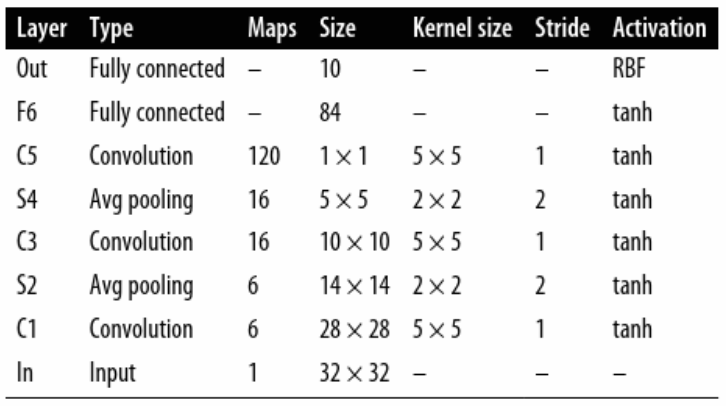

In [43]:
Image('figures/LeNet-5.png',width=500)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

## AlexNet

The AlexNet CNN architecture 11 won the 2012 ImageNet ILSVRC challenge by a large margin: it achieved a top-five error rate of 17%, while the second best achieved only 26%! It was developed by Alex Krizhevsky (hence the name), Ilya Sutskever, and Geoffrey Hinton. It is similar to LeNet-5, only much larger and deeper, and it was the first to stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer. Table 14-2 presents this architecture.

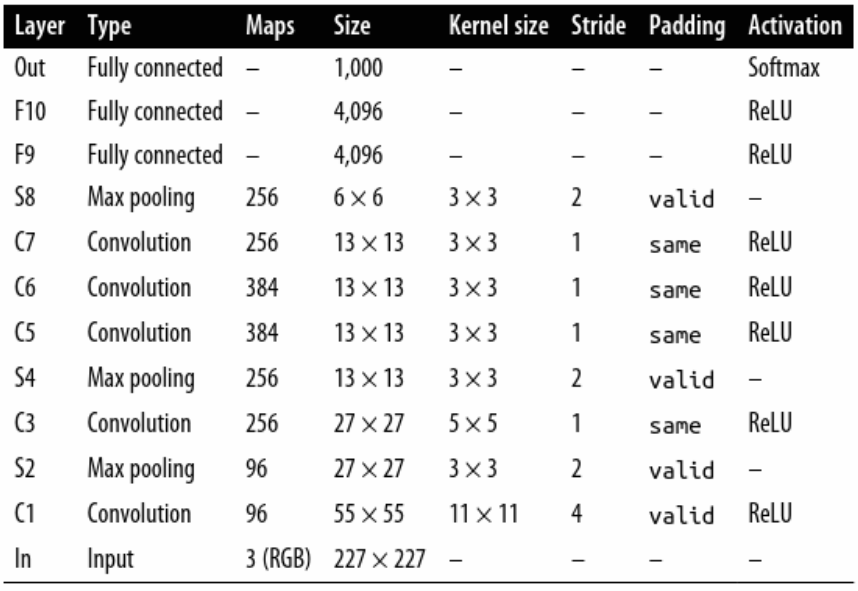

In [44]:
Image('figures/AlexNet.png',width=500)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

## GoogleNet

The GoogLeNet architecture was developed by Christian Szegedy et al. from Google Research, and it won the ILSVRC 2014 challenge by pushing the top-five error rate below 7%. This great performance came in large part from the fact that the network was much deeper than previous CNNs. This was made possible by subnetworks called **inception modules**, which allow GoogLeNet to use parameters much more efficiently than previous architectures: GoogLeNet actually has 10 times fewer parameters than AlexNet (roughly 6 million instead of 60 million). 

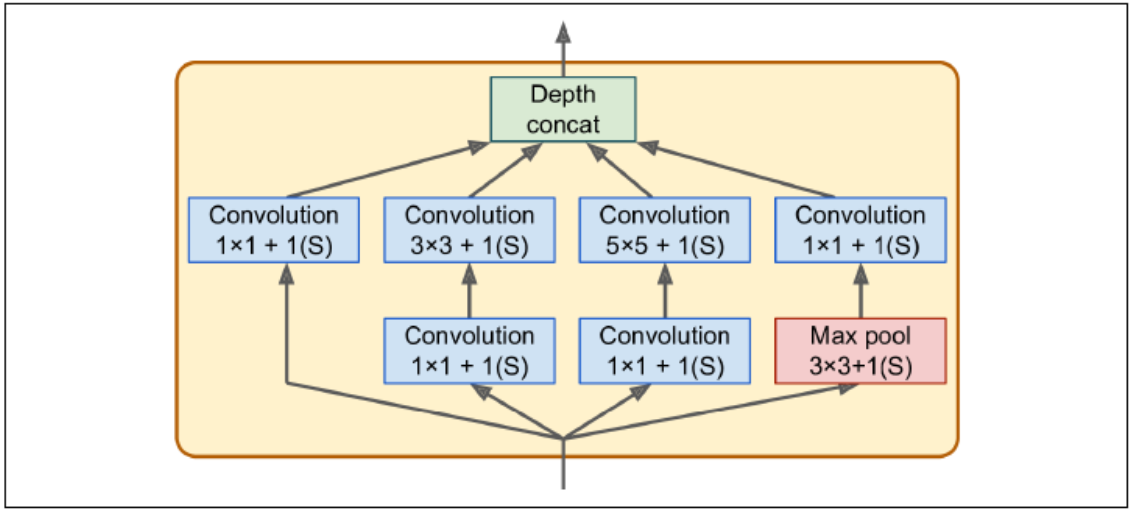

In [45]:
# Inception Module

Image('figures/inception_module.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

The notation $3 \times 3 + 1$(S) means that the layer uses a $3 \times 3$ kernel, stride 1, and "same" padding. 

* The input signal is first copied and fed to four different layers. All convolutional layers use the ReLU activation function. 

* The second set of convolutional layers uses different kernel sizes ($1 \times 1$, $3 \times 3$, and $5 \times 5$), allowing them to capture patterns at different scales. 

* Note that every single layer uses a stride of 1 and "same" padding (even the max pooling layer), so their outputs all have the same height and width as their inputs. This makes it possible to concatenate all the outputs along the depth dimension in the final depth concatenation layer (i.e., stack the feature maps from all four top convolutional layers). This concatenation layer can be implemented in TensorFlow using the ```tf.concat()``` operation, with axis=3 (the axis is the depth).

* Convolutional layers with $1 \times 1$ kernels cannot capture spatial patterns, but they can capture patterns along the depth dimension. Moreover, they are configured to output fewer feature maps than their inputs, so they serve as **bottleneck layers**, meaning they reduce dimensionality.

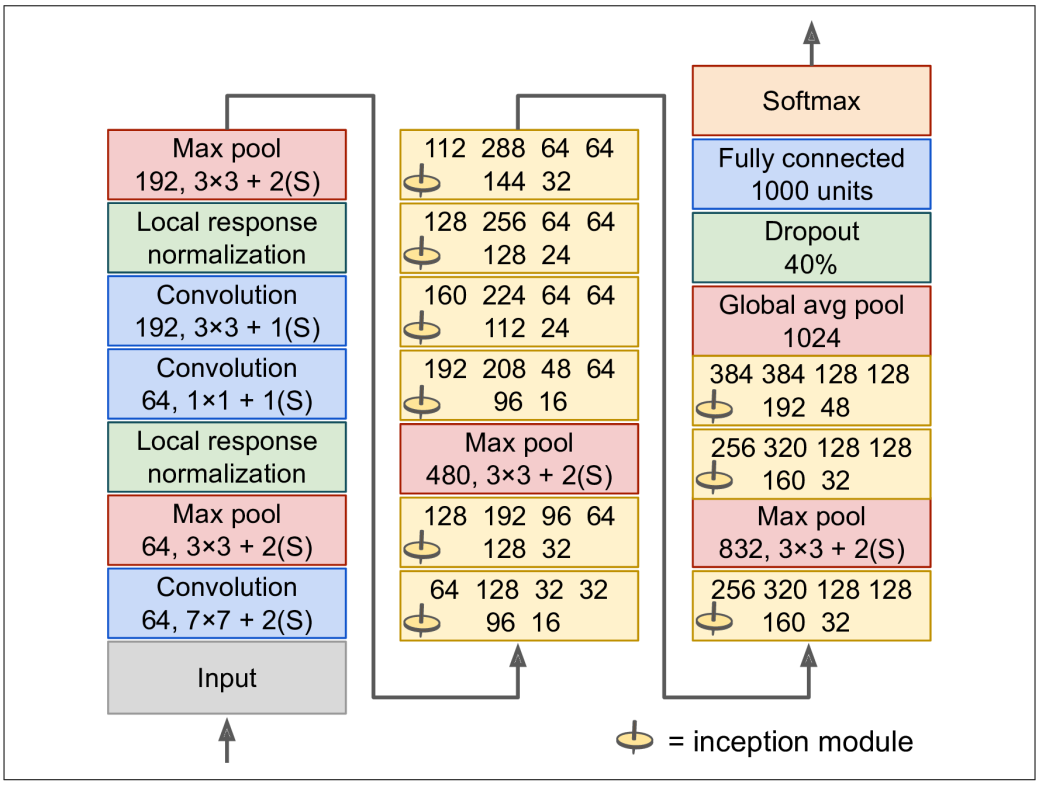

In [46]:
Image('figures/GoogleNet.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

Several variants of the GoogLeNet architecture were later proposed by Google researchers, including Inception-v3 and Inception-v4, using slightly different inception modules and reaching even better performance.

## VGGNet

The runner-up in the ILSVRC 2014 challenge was VGGNet, 15 developed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) research lab at Oxford University. It had a very simple and classical architecture, with 2 or 3 convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a pooling layer, and so on (reaching a total of just 16 or 19 convolutional layers, depending on the VGG variant), plus a final dense network with 2 hidden layers and the output layer. It used only $3 \times 3$ filters, but many filters.

## ResNet

Kaiming He et al. won the ILSVRC 2015 challenge using a Residual Network (or ResNet), that delivered an astounding top-five error rate under 3.6%. The winning variant used an extremely deep CNN composed of 152 layers (other variants had 34, 50, and 101 layers). It confirmed the general trend: models are getting deeper and deeper, with fewer and fewer parameters. 

The key to being able to train such a deep network is to use **skip connections** (also called *shortcut connections*): the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack. 

Let's see why this is useful. When training a neural network, the goal is to make it model a target function $h(x)$. If you add the input $x$ to the output of the network (i.e., you add a skip connection), then the network will be forced to model $f(x) = h(x) - x$ rather than $h(x)$. This is called **residual learning**.

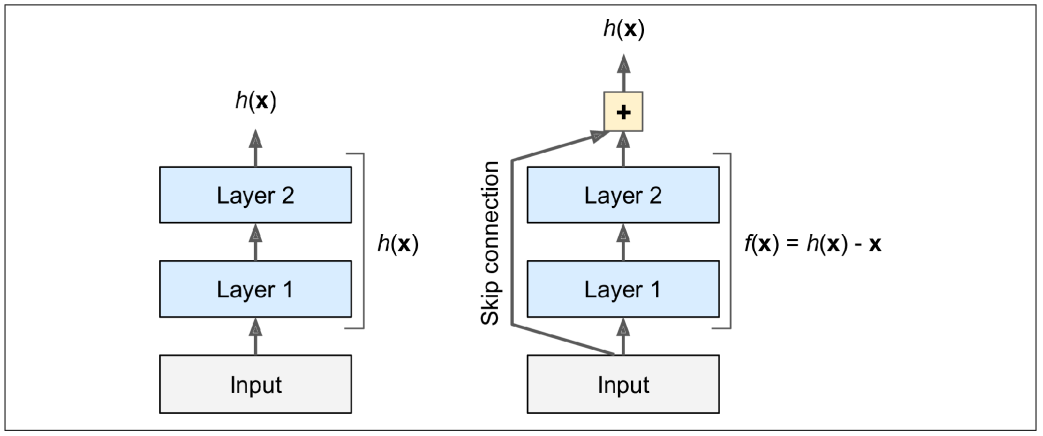

In [47]:
Image('figures/residual_learning.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

The ResNet architecture starts and ends exactly like GoogLeNet (except without a dropout layer), and in between is just a very deep stack of simple residual units. Each residual unit is composed of two convolutional layers (and no pooling layer!), with Batch Normalization (BN) and ReLU activation, using $3 \times 3$ kernels and preserving spatial dimensions (stride 1, "same" padding).

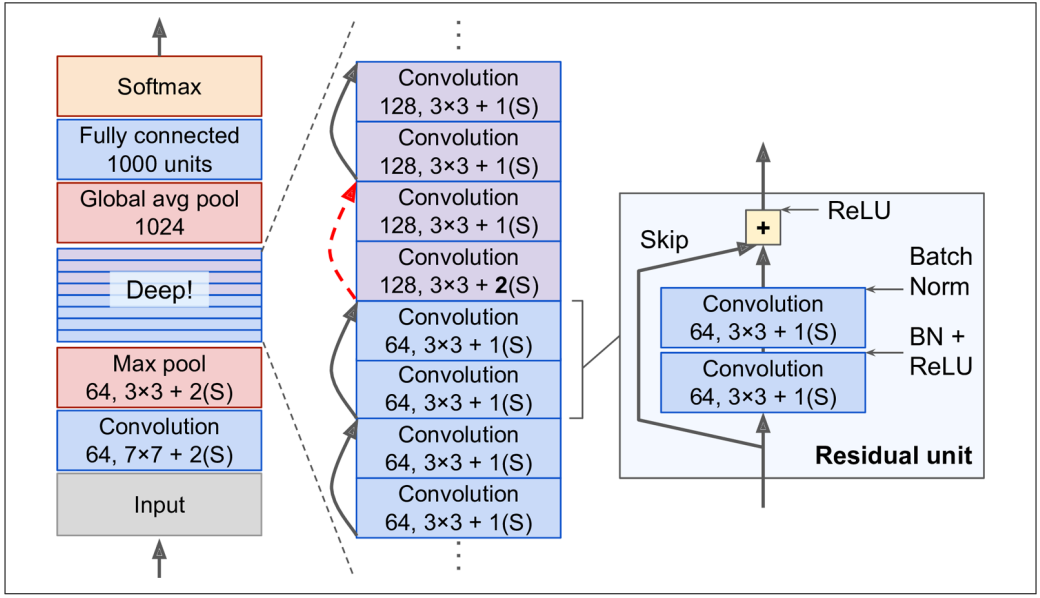

In [48]:
Image('figures/resnet_architecture.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing 3 residual units that output 64 feature maps, 4 residual units (RUs) with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps.

## Xception

Another variant of the GoogLeNet architecture is worth noting: **Xception** (which stands for **Extreme Inception**) was proposed in 2016 by François Chollet (the author of Keras), and it significantly outperformed Inception-v3 on a huge vision task (350 million images and 17,000 classes). Just like Inception-v4, it merges the ideas of GoogLeNet and ResNet, but it replaces the inception modules with a special type of layer called a **depth-wise separable convolution layer** (or **separable convolution layer** for short). These layers had been used before in some CNN architectures, but they were not as central as in the Xception architecture. 

While a regular convolutional layer uses filters that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face), a **separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately** (see below).

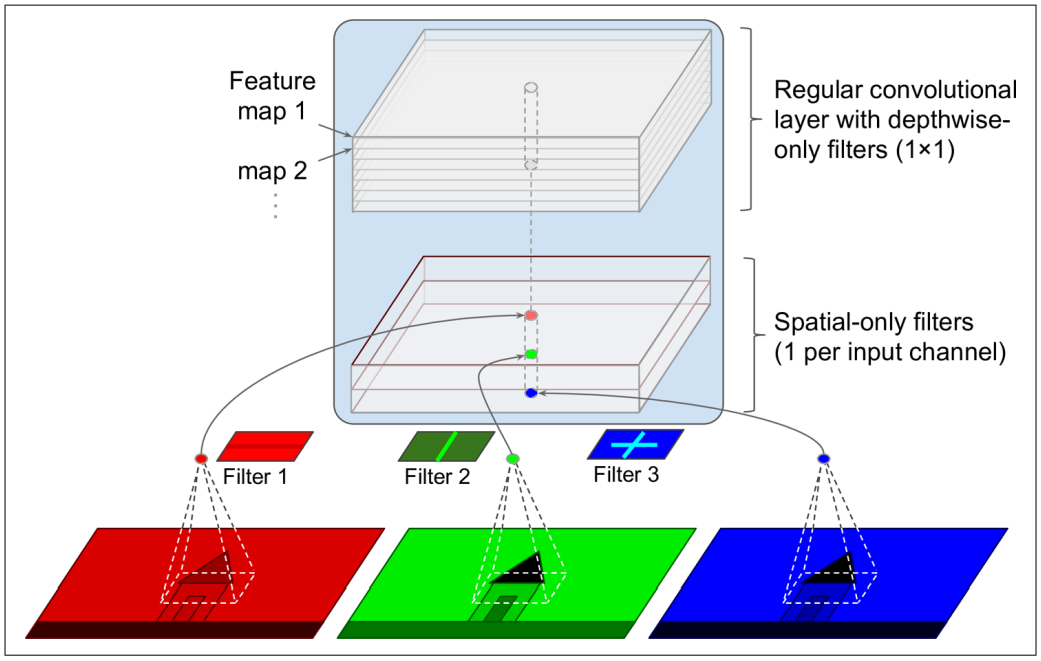

In [49]:
Image('figures/separable_convolutional_layer.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

Thus, it is composed of two parts: the first part applies a single spatial filter for each input feature map, then the second part looks exclusively for cross-channel patterns - it is just a regular convolutional layer with $1 \times 1$ filters.

---